In [94]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.pyplot import rcParams
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import euclidean_distances
from sklearn import cluster

In [95]:
# read csv file
dataf=pd.read_csv('household-living-costs-price.csv')
dataf.head() # print first 5 rows 

,hlpi_name,year,hlpi,tot_hhs,own,own_wm,own_prop,own_wm_prop,prop_hhs,age,size,income,expenditure,eqv_income,eqv_exp
0,All households,2008,allhh,1560859,1087580,574406,69.7,36.8,100.0,35.9,2.7,46704,42394,26869,25132
1,Beneficiary,2008,benef,185965,71256,39405,38.3,21.2,11.9,29.9,2.6,23404,25270,14258,15824
2,Income quintile 1 (low),2008,disq1,312376,191470,48424,61.3,15.5,20.0,40.0,2.3,16747,21145,13402,14408
3,Income quintile 2,2008,disq2,312333,196203,84171,62.8,26.9,20.0,34.7,2.8,31308,29855,18917,18266
4,Income quintile 3,2008,disq3,312240,217657,141318,69.7,45.3,20.0,31.5,3.0,49106,46561,26870,24672


In [96]:
# Data clean up
dataf =dataf[pd.notnull(dataf[['age','income','expenditure']])] # delet all boxes empty 

In [99]:
dataf=dataf[['age','income','expenditure']] # select the columns (it has an effect in household living)
rank_df=dataf.rank(method='first')  #rank : put Dimension the columns in (rank_df)
normalized_df=(rank_df-rank_df.mean())/rank_df.std() # normalized : the variable rank_df Subtract from it mean on std
normalized_df.head(10) # print first 10 rows from normalized_df

,age,income,expenditure
0,-0.214599,-0.214599,-0.214599
1,-1.379564,-1.379564,-1.256936
2,1.134308,-1.686133,-1.440877
3,-0.950366,-0.889052,-0.766424
4,-1.256936,-0.153285,0.153285
5,-0.521168,0.582482,0.521168
6,1.072994,1.379564,1.318250
7,0.950366,-1.318250,-1.686133
8,-0.153285,-0.643796,-0.889052
9,-1.134308,-0.091971,-0.153285


In [100]:
for n_cluster in [4,5,6,7,8]: # for loop to woek 8 clusters (and default 8)
    kmeans=KMeans(n_clusters=n_cluster).fit(
        normalized_df[['age','income','expenditure']]) # division clusters by kmeans and select effect columns 
    
    silhouette_avg=silhouette_score(
        normalized_df[['age','income','expenditure']],
        kmeans.labels_) # To adjust distances between circles
    print('Silhouette score for %i Clusters :%0.4f'%(n_cluster,silhouette_avg)) # print n_cluster and silhouette_avg

Silhouette score for 4 Clusters :0.4577
Silhouette score for 5 Clusters :0.4513
Silhouette score for 6 Clusters :0.4199
Silhouette score for 7 Clusters :0.4345
Silhouette score for 8 Clusters :0.3869


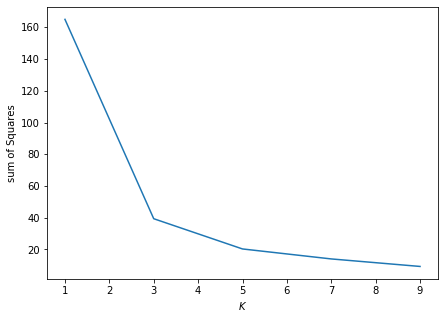

In [101]:
sse=[]
krange = list(range(1,10,2)) # made list be range start with 1 and count to 10 and continue with 2
X= normalized_df[['age','income','expenditure']].values 
for n in krange: # for loop to range 
    model=cluster.KMeans(n_clusters=n,random_state=3) 
    model.fit_predict(X) # to work prediction For value valuoes
    cluster_assignments=model.labels_
    centers=model.cluster_centers_
    sse.append(np.sum((X-centers[cluster_assignments])**2)) 

rcParams['figure.figsize'] = 7,5 # made figure and figsize by Dimension 7*5
plt.plot(krange,sse) # plot list range with sse
plt.xlabel('$K$') 
plt.ylabel('sum of Squares')


plt.show()

In [102]:

kmeans=KMeans(n_clusters=5).fit(normalized_df[['age','income','expenditure']]) # Dimension the columns and select number clusters and fit normalized
five_cluster_df=normalized_df[['age','income','expenditure']].copy(deep=True) # copy normalized columns in variable(five_cluster_df)
five_cluster_df['Cluster']=kmeans.labels_ # create cluster column and put in it Kmeans and is labels
five_cluster_df.head(10)

,age,income,expenditure,Cluster
0,-0.214599,-0.214599,-0.214599,4
1,-1.379564,-1.379564,-1.256936,0
2,1.134308,-1.686133,-1.440877,2
3,-0.950366,-0.889052,-0.766424,0
4,-1.256936,-0.153285,0.153285,4
5,-0.521168,0.582482,0.521168,3
6,1.072994,1.379564,1.318250,1
7,0.950366,-1.318250,-1.686133,2
8,-0.153285,-0.643796,-0.889052,4
9,-1.134308,-0.091971,-0.153285,4


In [103]:
 # select number clusters 
cluster0_metrics=kmeans.cluster_centers_[0]
cluster1_metrics=kmeans.cluster_centers_[1]
cluster2_metrics=kmeans.cluster_centers_[2]
cluster3_metrics=kmeans.cluster_centers_[3]
cluster4_metrics=kmeans.cluster_centers_[4]

data=[cluster0_metrics,cluster1_metrics,cluster2_metrics,cluster3_metrics,cluster4_metrics] # select data 
cluster_center_df=pd.DataFrame(data) # adjust cluster centers by data frame
cluster_center_df.colums=five_cluster_df.columns[0:4] 
five_cluster_df.head()


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  # Remove the CWD from sys.path while we load stuff.


,age,income,expenditure,Cluster
0,-0.214599,-0.214599,-0.214599,4
1,-1.379564,-1.379564,-1.256936,0
2,1.134308,-1.686133,-1.440877,2
3,-0.950366,-0.889052,-0.766424,0
4,-1.256936,-0.153285,0.153285,4


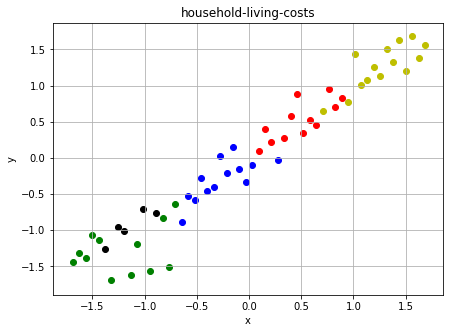

In [106]:
# plot scatter to income with expenditure
plt.scatter(
five_cluster_df.loc[five_cluster_df['Cluster']==0]['income'],
five_cluster_df.loc[five_cluster_df['Cluster']==0]['expenditure'],
c='k')
plt.scatter(
five_cluster_df.loc[five_cluster_df['Cluster']==1]['income'],
five_cluster_df.loc[five_cluster_df['Cluster']==1]['expenditure'],
c='y')
plt.scatter(
five_cluster_df.loc[five_cluster_df['Cluster']==2]['income'],
five_cluster_df.loc[five_cluster_df['Cluster']==2]['expenditure'],
c='g')

plt.scatter(
five_cluster_df.loc[five_cluster_df['Cluster']==3]['income'],
five_cluster_df.loc[five_cluster_df['Cluster']==3]['expenditure'],
c='r')

plt.scatter(
five_cluster_df.loc[five_cluster_df['Cluster']==4]['income'],
five_cluster_df.loc[five_cluster_df['Cluster']==4]['expenditure'],
c='b')


plt.title('household-living-costs')
plt.xlabel('x')
plt.ylabel('y')

plt.grid()
plt.show()



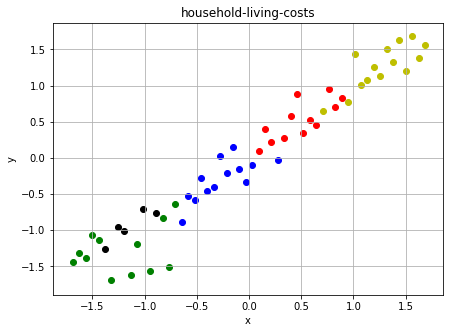

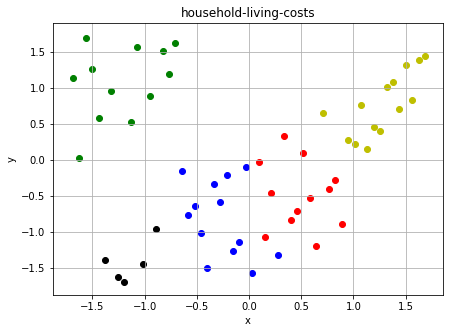

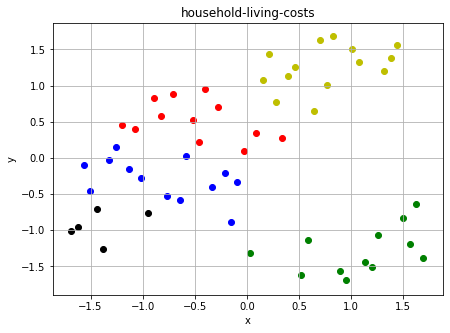

In [107]:
#plot all three columns with some

# plot scatter to income with expenditure
plt.scatter(
five_cluster_df.loc[five_cluster_df['Cluster']==0]['income'],
five_cluster_df.loc[five_cluster_df['Cluster']==0]['expenditure'],
c='k')
plt.scatter(
five_cluster_df.loc[five_cluster_df['Cluster']==1]['income'],
five_cluster_df.loc[five_cluster_df['Cluster']==1]['expenditure'],
c='y')
plt.scatter(
five_cluster_df.loc[five_cluster_df['Cluster']==2]['income'],
five_cluster_df.loc[five_cluster_df['Cluster']==2]['expenditure'],
c='g')

plt.scatter(
five_cluster_df.loc[five_cluster_df['Cluster']==3]['income'],
five_cluster_df.loc[five_cluster_df['Cluster']==3]['expenditure'],
c='r')

plt.scatter(
five_cluster_df.loc[five_cluster_df['Cluster']==4]['income'],
five_cluster_df.loc[five_cluster_df['Cluster']==4]['expenditure'],
c='b')
plt.title('household-living-costs')
plt.xlabel('x')
plt.ylabel('y')

plt.grid()
plt.show()

# plot scatter to income with age
plt.scatter(
five_cluster_df.loc[five_cluster_df['Cluster']==0]['income'],
five_cluster_df.loc[five_cluster_df['Cluster']==0]['age'],
c='k')
plt.scatter(
five_cluster_df.loc[five_cluster_df['Cluster']==1]['income'],
five_cluster_df.loc[five_cluster_df['Cluster']==1]['age'],
c='y')
plt.scatter(
five_cluster_df.loc[five_cluster_df['Cluster']==2]['income'],
five_cluster_df.loc[five_cluster_df['Cluster']==2]['age'],
c='g')

plt.scatter(
five_cluster_df.loc[five_cluster_df['Cluster']==3]['income'],
five_cluster_df.loc[five_cluster_df['Cluster']==3]['age'],
c='r')

plt.scatter(
five_cluster_df.loc[five_cluster_df['Cluster']==4]['income'],
five_cluster_df.loc[five_cluster_df['Cluster']==4]['age'],
c='b')
plt.title('household-living-costs')
plt.xlabel('x')
plt.ylabel('y')

plt.grid()
plt.show()


# plot scatter to age with expenditure
plt.scatter(
five_cluster_df.loc[five_cluster_df['Cluster']==0]['age'],
five_cluster_df.loc[five_cluster_df['Cluster']==0]['expenditure'],
c='k')
plt.scatter(
five_cluster_df.loc[five_cluster_df['Cluster']==1]['age'],
five_cluster_df.loc[five_cluster_df['Cluster']==1]['expenditure'],
c='y')
plt.scatter(
five_cluster_df.loc[five_cluster_df['Cluster']==2]['age'],
five_cluster_df.loc[five_cluster_df['Cluster']==2]['expenditure'],
c='g')

plt.scatter(
five_cluster_df.loc[five_cluster_df['Cluster']==3]['age'],
five_cluster_df.loc[five_cluster_df['Cluster']==3]['expenditure'],
c='r')

plt.scatter(
five_cluster_df.loc[five_cluster_df['Cluster']==4]['age'],
five_cluster_df.loc[five_cluster_df['Cluster']==4]['expenditure'],
c='b')
plt.title('household-living-costs')
plt.xlabel('x')
plt.ylabel('y')

plt.grid()
plt.show()



In [ ]:


'''high_value_cluster=five_cluster_df.loc[five_cluster_df['Cluster']==2]
pd.DataFrame(dataf.loc[dataf['......'].isin(high_value_cluster.index)].groupby(
'Description').count()['StockCode'].sort_values(ascending=False).head())'''